In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("3.12.+Example.csv")

In [3]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

Text(0, 0.5, 'Loyalty')

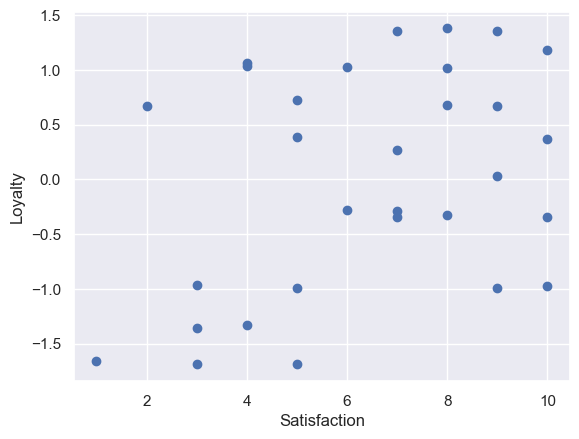

In [4]:
plt.scatter(data["Satisfaction"], data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

## Select the features

In [5]:
x = data.copy()

## Clustering

In [6]:
kmeans = KMeans(2)

In [7]:
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [8]:
clusters = x.copy()
clusters["cluster_pred"] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

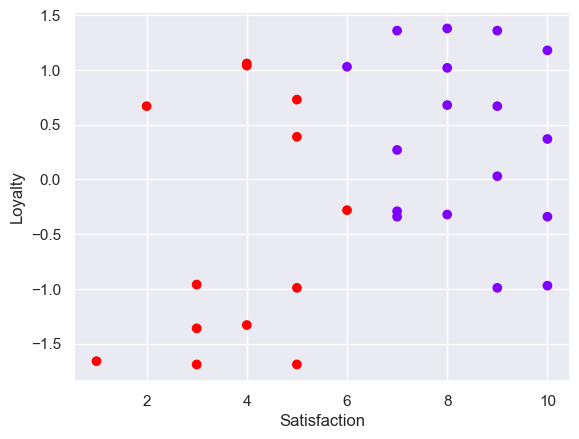

In [19]:
plt.scatter(clusters["Satisfaction"], clusters["Loyalty"], c=clusters["cluster_pred"], cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

## Standardize the variables

In [13]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [14]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\sebas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[60.0,
 29.818973034723147,
 18.129659446063222,
 10.24718180592842,
 7.792695153937187,
 6.54983679159933,
 5.326631124753926,
 4.315662464700005,
 3.752355196324647]

Text(0, 0.5, 'Within-cluster Sum of Squares')

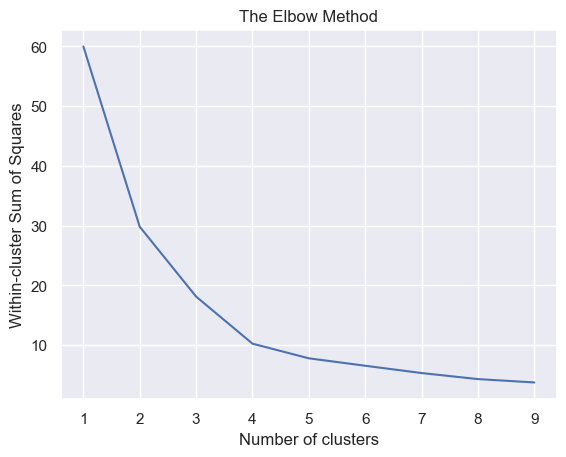

In [15]:
plt.plot(range(1,10), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster Sum of Squares")

## Explore clustering solutions and select the number of clusters

In [23]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new["cluster_pred"] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,3
5,1,-1.66,2
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

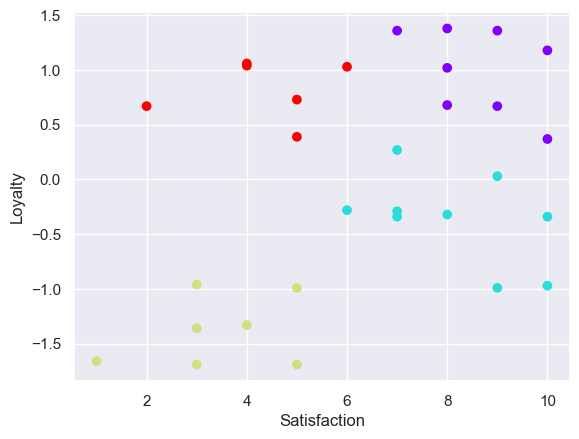

In [24]:
plt.scatter(clusters_new["Satisfaction"], clusters_new["Loyalty"], c=clusters_new["cluster_pred"], cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

# Conclusion

### 4 clusters looks like the best solution. The green ones are the alienateds, red ones are our supporters, blue ones are the roamers and purple ones are the Fans of our brand. If we continue with more clusters, this clears groups will be splitted. For that reason this is the best solution when we do a market segmentation